In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('day wise covid cases.csv')

first few rows of dataset

In [42]:
print(df.head())
print(df.info())
print(df.describe())

         Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0  22-01-2020        555      17         28     510          0           0   
1  23-01-2020        654      18         30     606         99           1   
2  24-01-2020        941      26         36     879        287           8   
3  25-01-2020       1434      42         39    1353        493          16   
4  26-01-2020       2118      56         52    2010        684          14   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2              6                2.76                   3.83   
3              3                2.93                   2.72   
4             13                2.64                   2.46   

   Deaths / 100 Recovered  No. of countries  
0                   60.71                 6  
1                   60.00                 8  
2             

data type

In [43]:

print(df.dtypes)

Date                       object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
No. of countries            int64
dtype: object


In [44]:
print(df.describe())

          Confirmed         Deaths      Recovered        Active     New cases  \
count  9.900000e+01      99.000000      99.000000  9.900000e+01     99.000000   
mean   7.154300e+05   45675.505051  181447.303030  4.883072e+05  32318.353535   
std    9.663754e+05   68713.463709  250927.402425  6.504458e+05  35489.997974   
min    5.550000e+02      17.000000      28.000000  5.100000e+02      0.000000   
25%    6.982200e+04    1718.000000    9610.500000  4.245300e+04   2071.500000   
50%    1.258530e+05    4604.000000   65113.000000  5.899600e+04   7663.000000   
75%    1.228445e+06   70670.500000  247774.500000  9.100000e+05  72810.000000   
max    3.185195e+06  228742.000000  925752.000000  2.030701e+06  96974.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count    99.000000      99.000000           99.000000              99.000000   
mean   2310.353535    9350.747475            4.223535              24.470909   
std    2847.819894   11816.291

missing value

In [45]:
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64


Drop un_needed columns

In [46]:
df = df.drop("No. of countries", axis=1)

In [47]:
df.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered'],
      dtype='object')

Transform data type

In [48]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [49]:
df.dtypes

Date                      datetime64[ns]
Confirmed                          int64
Deaths                             int64
Recovered                          int64
Active                             int64
New cases                          int64
New deaths                         int64
New recovered                      int64
Deaths / 100 Cases               float64
Recovered / 100 Cases            float64
Deaths / 100 Recovered           float64
dtype: object

Rename columns

In [50]:
df = df.rename(columns={
    'Confirmed': 'TotalConfirmed',
    'Deaths': 'TotalDeaths',
    'Recovered': 'TotalRecovered',
    'Deaths / 100 Cases': 'DeathRate',
    'Recovered / 100 Cases': 'RecoveryRate',
    'Deaths / 100 Recovered': 'MortalityRate'
})

In [51]:
df.rename

<bound method DataFrame.rename of          Date  TotalConfirmed  TotalDeaths  TotalRecovered   Active  \
0  2020-01-22             555           17              28      510   
1  2020-01-23             654           18              30      606   
2  2020-01-24             941           26              36      879   
3  2020-01-25            1434           42              39     1353   
4  2020-01-26            2118           56              52     2010   
..        ...             ...          ...             ...      ...   
94 2020-04-25         2891199       206979          798239  1885981   
95 2020-04-26         2964146       210862          825969  1927315   
96 2020-04-27         3032850       215511          852382  1964957   
97 2020-04-28         3108149       221974          884680  2001495   
98 2020-04-29         3185195       228742          925752  2030701   

    New cases  New deaths  New recovered  DeathRate  RecoveryRate  \
0           0           0              0    

create a calculated field

In [52]:
df['Active'] = df['TotalConfirmed'] - df['TotalDeaths'] - df['TotalRecovered']
df

,Date,TotalConfirmed,TotalDeaths,TotalRecovered,Active,New cases,New deaths,New recovered,DeathRate,RecoveryRate,MortalityRate
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69
...,...,...,...,...,...,...,...,...,...,...,...
94,2020-04-25,2891199,206979,798239,1885981,84932,5578,26910,7.16,27.61,25.93
95,2020-04-26,2964146,210862,825969,1927315,72948,3883,27730,7.11,27.87,25.53
96,2020-04-27,3032850,215511,852382,1964957,68704,4649,26413,7.11,28.10,25.28
97,2020-04-28,3108149,221974,884680,2001495,75404,6463,32298,7.14,28.46,25.09


Remove duplicate rows

In [53]:
df = df.drop_duplicates()

In [54]:
print("number of row after dropping duplicates", len(df))
print(df.head())

number of row after dropping duplicates 99
        Date  TotalConfirmed  TotalDeaths  TotalRecovered  Active  New cases  \
0 2020-01-22             555           17              28     510          0   
1 2020-01-23             654           18              30     606         99   
2 2020-01-24             941           26              36     879        287   
3 2020-01-25            1434           42              39    1353        493   
4 2020-01-26            2118           56              52    2010        684   

   New deaths  New recovered  DeathRate  RecoveryRate  MortalityRate  
0           0              0       3.06          5.05          60.71  
1           1              2       2.75          4.59          60.00  
2           8              6       2.76          3.83          72.22  
3          16              3       2.93          2.72         107.69  
4          14             13       2.64          2.46         107.69  


Deal with outliers

<ipython-input-69-f64944651bb3>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean().plot(kind='bar', figsize=(10, 6), title='Mean Values of COVID-19 Data Without Outliers')


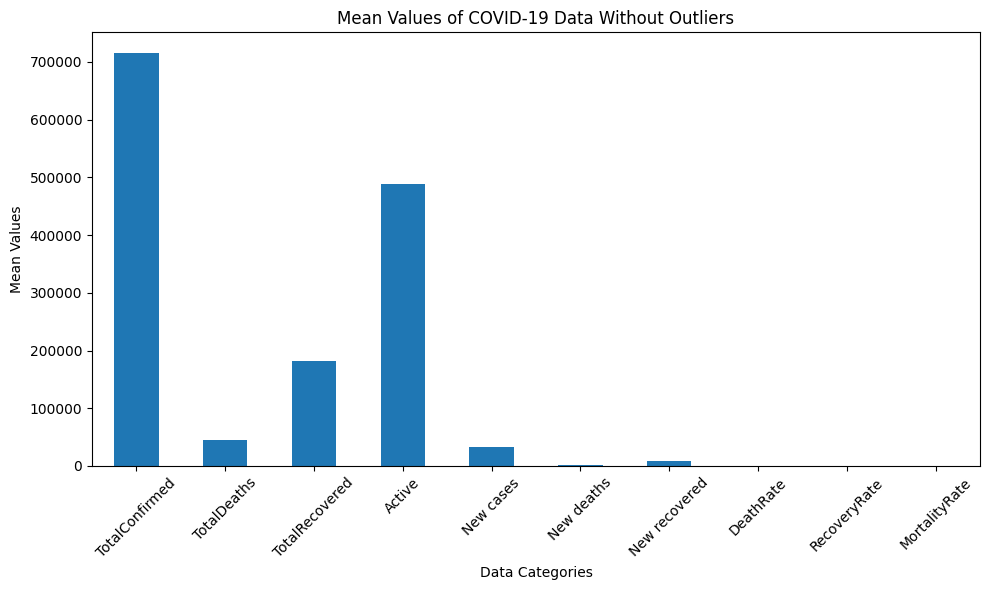

In [69]:
df.mean().plot(kind='bar', figsize=(10, 6), title='Mean Values of COVID-19 Data Without Outliers')
plt.xlabel('Data Categories')
plt.ylabel('Mean Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


saving to new CSV file

In [70]:
df.to_csv("cleaned_dayWiseCovid.csv", index=False)
print(df.head())

        Date  TotalConfirmed  TotalDeaths  TotalRecovered  Active  New cases  \
0 2020-01-22             555           17              28     510          0   
1 2020-01-23             654           18              30     606         99   
2 2020-01-24             941           26              36     879        287   
3 2020-01-25            1434           42              39    1353        493   
4 2020-01-26            2118           56              52    2010        684   

   New deaths  New recovered  DeathRate  RecoveryRate  MortalityRate  
0           0              0       3.06          5.05          60.71  
1           1              2       2.75          4.59          60.00  
2           8              6       2.76          3.83          72.22  
3          16              3       2.93          2.72         107.69  
4          14             13       2.64          2.46         107.69  
